#FIT5196 Data wrangling - TP3 2016
#Assessment Task 1: Parse Raw Data
#Author: Ashley Bythell
#Student ID: 27347885

# Task 1:  Examining and Loading Data.

In [330]:
#import libraries - pandas, numpy

In [331]:
import pandas as pd 
import datetime 
import numpy as np


In [332]:
#Python 2.7 shows future warnings - this will disable those warnings.

In [333]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [334]:
#read data.dat file into dataframe via pd.read_table command - as tab separated file.  Use column names col1 -> col12

In [335]:
df = pd.read_table('data.dat',  sep= "\t", names = ['col1', 'col2', 'col3','col4','col5','col6','col7', 'col8', 'col9', 'col10', 'col11', 'col12'])


In [336]:
#initial check of row number/columns.

In [337]:
df.shape

(17829, 12)

In [338]:
#initial check of data types

In [339]:
df.dtypes

col1     object
col2     object
col3     object
col4     object
col5     object
col6     object
col7     object
col8     object
col9     object
col10    object
col11    object
col12    object
dtype: object

In [340]:
#check first rows of dataframe.

In [341]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
0,Start = 00102008,End = 00102008,Country:Afghanistan,"Location:Kunduz, Balkh, Faryab, Ba ...",Type:Drought,Sub_Type:Drought,Name:nan,Killed = nan,Affected = 280000.0,Cost = nan,International support = nan,ID = 2008-9475
1,Start = 00072006,End = 00002006,Country:Afghanistan,Location:nan,Type:Drought,Sub_Type:Drought,Name:nan,Killed = nan,Affected = 1900000.0,Cost = nan,International support = nan,ID = 2006-9570
2,Start = 00052000,End = 00002002,Country:Afghanistan,"Location:Kandahar, Helmand, Nimroz ...",Type:Drought,Sub_Type:Drought,Name:nan,Killed = 37.0,Affected = 2580000.0,Cost = 0.05,International support = 968.627,ID = 2000-9186
3,Start = 00081971,End = 00001973,Country:Afghanistan,"Location:Central, North-West, Nort ...",Type:Drought,Sub_Type:Drought,Name:nan,Killed = nan,Affected = nan,Cost = nan,International support = nan,ID = 1971-9085
4,Start = 00011969,End = 00001969,Country:Afghanistan,Location:Paktia province,Type:Drought,Sub_Type:Drought,Name:nan,Killed = nan,Affected = 48000.0,Cost = 0.2,International support = nan,ID = 1969-9007


# Task 2:  Parsing all the columns in the DataFrame.

In [342]:
#Split columns from label/value and assign value to new field.

In [343]:
df['ID'] = df.col12.str.split('=').str.get(1)
df['Start_Date'] = df.col1.str.split('=').str.get(1)
df['End_Date'] = df.col2.str.split('=').str.get(1)
df['Country'] = df.col3.str.split(':').str.get(1)
df['Location'] = df.col4.str.split(':').str.get(1)
df['Type'] = df.col5.str.split(':').str.get(1)
df['Sub_Type'] = df.col6.str.split(':').str.get(1)
df['Name'] = df.col7.str.split(':').str.get(1)
df['Killed'] = df.col8.str.split('=').str.get(1)
df['Affected'] = df.col9.str.split('=').str.get(1)
df['Cost'] = df.col10.str.split('=').str.get(1)
df['International_Support'] = df.col11.str.split('=').str.get(1)

In [344]:
#remove existing columns containing both label/values.

In [345]:
df.drop(['col1','col2','col3', 'col4', 'col5' , 'col6' , 'col7' ,'col8' , 'col9', 'col10', 'col11', 'col12'], axis = 1, inplace=True)

In [346]:
#change type of numeric fields to floats

In [347]:
df.Cost = df.Cost.astype(float)
df.Affected = df.Affected.astype(float)
df.Killed = df.Killed.astype(float)
df.International_Support = df.International_Support.astype(float)

In [348]:
#Convert NAN's to 0.0's for numeric fields. (NAN's for text's proved difficult to remove/replace so left in dataset)

In [349]:
df.Killed = df.Killed.replace(np.nan,'0.0', regex=True)
df.Cost = df.Cost.replace(np.nan,'0.0', regex=True)
df.International_Support = df.International_Support.replace(np.nan,'0.0', regex=True)
df.Affected = df.Affected.replace(np.nan,'0.0', regex=True)

In [350]:
df.head()

,ID,Start_Date,End_Date,Country,Location,Type,Sub_Type,Name,Killed,Affected,Cost,International_Support
0,2008-9475,00102008,00102008,Afghanistan,"Kunduz, Balkh, Faryab, Ba ...",Drought,Drought,nan,0.0,280000,0.0,0.0
1,2006-9570,00072006,00002006,Afghanistan,nan,Drought,Drought,nan,0.0,1.9e+06,0.0,0.0
2,2000-9186,00052000,00002002,Afghanistan,"Kandahar, Helmand, Nimroz ...",Drought,Drought,nan,37,2.58e+06,0.05,968.627
3,1971-9085,00081971,00001973,Afghanistan,"Central, North-West, Nort ...",Drought,Drought,nan,0.0,0.0,0.0,0.0
4,1969-9007,00011969,00001969,Afghanistan,Paktia province,Drought,Drought,nan,0.0,48000,0.2,0.0


In [351]:
df.dtypes

ID                       object
Start_Date               object
End_Date                 object
Country                  object
Location                 object
Type                     object
Sub_Type                 object
Name                     object
Killed                   object
Affected                 object
Cost                     object
International_Support    object
dtype: object

In [352]:
#Change string to floats for numeric - allow for better analysis

In [353]:
df.Cost = df.Cost.astype(float)
df.Affected = df.Affected.astype(float)
df.Killed = df.Killed.astype(float)
df.International_Support = df.International_Support.astype(float)

# Exploration

In [354]:
df['ID'].describe() #understand number of records, number of unique ID's - same ID used for multiple rows.

count          17829
unique         16944
top        2002-0858
freq              29
Name: ID, dtype: object

In [355]:
df['ID'].value_counts() #Understand the number of ID's used, appears that natural disaster impacted number of locations with count of 29 for one disaster

 2002-0858    29
 2005-0713    25
 2003-0391    15
 1980-9114    15
 1990-0722    13
 2007-0019    13
 2004-0462    13
 2007-0235    13
 2005-0011    12
 1989-0115    12
 1990-0717    12
 2004-0659    12
 2004-0392    11
 1990-0723    11
 2005-0045    11
 1990-9604    10
 2007-0360    10
 1940-9002     9
 1910-9006     9
 2006-0156     9
 2004-0515     9
 1999-9388     9
 1983-9060     8
 2008-0352     8
 2005-0585     8
 1990-0721     8
 1969-9006     8
 2008-0082     7
 1981-9309     7
 1999-0590     7
              ..
 1994-0323     1
 1997-0497     1
 1997-0496     1
 1997-0499     1
 1997-0498     1
 1994-0321     1
 1997-0365     1
 1999-0558     1
 1999-0559     1
 1999-0556     1
 1999-0554     1
 1999-0555     1
 1999-0552     1
 1999-0553     1
 1999-0551     1
 1983-0208     1
 1996-0355     1
 1996-0354     1
 1996-0357     1
 1996-0356     1
 1996-0351     1
 1996-0350     1
 1996-0353     1
 1996-0352     1
 1984-0153     1
 1985-0299     1
 1997-0112     1
 1996-0359    

In [356]:
df['Start_Date'].describe() 

count         17829
unique         9031
top        00012000
freq             29
Name: Start_Date, dtype: object

In [357]:
df['Start_Date'].value_counts()  #displays some of the values for the start date column - appears days/months are missing for some dates

 00012000    29
 00072000    29
 00011999    25
 00072007    24
 00001987    24
 00001981    23
 00062000    23
 00012001    22
 00012002    21
 00001986    21
 00052000    20
 00012006    19
 00032000    18
 00082000    18
 00072004    18
 00072002    18
 00001988    17
 00011995    17
 00001982    16
 00011989    16
 00001977    16
 01012006    16
 00031991    15
 00082001    15
 00001978    15
 27122005    15
 00001979    15
 26122004    15
 00092000    15
 00001984    15
             ..
 02081968     1
 01061986     1
 18031985     1
 09012005     1
 11032000     1
 01061988     1
 06022006     1
 28022006     1
 27101959     1
 06022003     1
 23091955     1
 17021969     1
 18101977     1
 30081996     1
 30081993     1
 06051975     1
 25031939     1
 20042007     1
 20042001     1
 20042000     1
 14111984     1
 20042002     1
 31121986     1
 00111953     1
 31121984     1
 00111951     1
 00111957     1
 00111954     1
 18031981     1
 25042006     1
Name: Start_Date, dtype:

In [358]:
df['End_Date'].describe()  #non numeric

count         17829
unique         9038
top        00001983
freq             37
Name: End_Date, dtype: object

In [359]:
df['End_Date'].value_counts()  #Understand the type of values in the End Date column - appears months/days are missing from some rows


 00001983    37
 00001985    29
 00001988    28
 00002001    28
 00001987    27
 00012000    27
 00072000    26
 00002002    26
 00072007    25
 00001984    24
 00001998    23
 00001986    23
 00002000    22
 00001981    22
 00001978    20
 00062000    19
 00001975    19
 00072004    18
 00001980    18
 00001982    18
 00001977    18
 00012006    17
 00001991    16
 00011995    16
 00082001    16
 00011999    16
 00001992    15
 00012002    15
 00001999    15
 00072002    15
             ..
 31072007     1
 11032005     1
 16121920     1
 19101928     1
 11032004     1
 18121939     1
 02101987     1
 30081993     1
 30081991     1
 30081996     1
 18032001     1
 06101996     1
 08101952     1
 30051979     1
 22071976     1
 22071972     1
 18032006     1
 18032005     1
 18032002     1
 28022007     1
 30081994     1
 30042005     1
 01041994     1
 00011965     1
 28022002     1
 27101959     1
 00011960     1
 23091955     1
 17021969     1
 26081996     1
Name: End_Date, dtype: i

In [360]:
df['Country'].describe()  #describes number of countries in dataset - 212

count     17829
unique      232
top       China
freq       1304
Name: Country, dtype: object

In [361]:
df["Country"].value_counts() #understand which countries involved in disaster - appears China/India/US has high number of disasters

China                            1304
India                            1169
United States                    1038
Philippines                       648
Indonesia                         553
Bangladesh                        457
Nigeria                           368
Japan                             339
Pakistan                          316
Iran Islam Rep                    314
Mexico                            312
Brazil                            307
Russia                            275
Turkey                            260
Peru                              243
South Africa                      222
Australia                         221
Viet Nam                          213
Colombia                          209
France                            207
Canada                            196
Thailand                          183
Zaire/Congo Dem Rep               173
Egypt                             172
Italy                             168
United Kingdom                    164
Afghanistan 

In [362]:
df['Location'].describe()  #Understand all the unique locations.

count     17829
unique    12846
top         nan
freq       2360
Name: Location, dtype: object

In [363]:
df["Location"].value_counts() #Provide overview of Locations and NAN values.

nan                              2360
North                              69
South                              56
Countrywide                        34
Uttar Pradesh                      32
Central                            30
Lagos                              24
Texas                              23
Nationwide                         22
Yunnan province                    22
Andhra Pradesh                     21
Northern                           21
Shanxi province                    20
California                         19
Bangkok                            19
Sichuan province                   16
New York                           16
Karachi                            16
Chittagong                         16
New Delhi                          16
West                               16
Tamil Nadu                         15
Cairo                              15
Jakarta                            15
Hunan province                     14
East                               14
Florida     

In [364]:
df['Type'].describe()  #Identify number of disaster types.

count                  17829
unique                    18
top       Transport Accident
freq                    4155
Name: Type, dtype: object

In [365]:
df["Type"].value_counts() #Frequency of disaster type observations.

Transport Accident               4155
Flood                            3512
Storm                            3207
Industrial Accident              1190
Epidemic                         1179
Miscellaneous accident           1133
Earthquake (seismic activity)    1120
Drought                           561
Mass movement wet                 505
Extreme temperature               361
Wildfire                          340
Volcano                           211
Transport accident                196
Insect infestation                 83
Mass movement dry                  48
Mass Movement Wet                  12
Complex Disasters                  12
Mass Movement Dry                   4
Name: Type, dtype: int64

In [366]:
df['Sub_Type'].describe() 

count     17829
unique       48
top         nan
freq       2304
Name: Sub_Type, dtype: object

In [367]:
df["Sub_Type"].value_counts()

nan                                     2304
Road                                    1939
Tropical cyclone                        1729
General flood                           1588
Earthquake (ground shaking)             1072
Water                                    992
Air                                      886
Explosion                                782
Fire                                     731
Bacterial Infectious Diseases            637
Local storm                              586
Drought                                  561
Rail                                     532
Landslide                                468
Flash flood                              393
Viral Infectious Diseases                353
Collapse                                 318
Other                                    261
Forest fire                              240
Volcanic eruption                        211
Cold wave                                170
Heat wave                                149
General Fl

In [368]:
df['Name'].describe() 

count     17829
unique     2605
top         nan
freq      12176
Name: Name, dtype: object

In [369]:
df["Name"].value_counts()

nan                                  12176
Cholera                                377
Coal mine                              347
Mine                                    79
Building                                72
Ferry                                   67
Meningococcal disease                   58
Factory                                 42
Helicopter                              36
Bridge                                  33
Dengue fever                            32
Hotel                                   32
Fireworks factory                       31
Acute respiratory syndrome (SARS)       29
Dam                                     28
Yellow fever                            28
Dengue                                  26
Acute watery diarrhoeal syndrome        24
Boeing 737                              24
Gold mine                               23
Locust                                  22
Food poisoning                          21
Oil pipeline                            17
Prison     

In [370]:
df['Killed'].describe() #As Numeric fields, Describe should give some brief info - mean, etc

count    1.782900e+04
mean     2.133963e+03
std      6.660385e+04
min      0.000000e+00
25%      2.000000e+00
50%      1.600000e+01
75%      4.300000e+01
max      5.000000e+06
Name: Killed, dtype: float64

In [371]:
df['Cost'].describe()  #As Numeric fields, Describe should give some brief info - mean, etc

count     17829.000000
mean        103.406329
std        1569.207358
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      125000.000000
Name: Cost, dtype: float64

In [372]:
df['Affected'].describe()  #As Numeric fields, Describe should give some brief info - mean, etc

count    1.782900e+04
mean     3.473482e+05
std      5.487540e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.000000e+03
max      3.000000e+08
Name: Affected, dtype: float64

In [373]:
df['International_Support'].describe()  #As Numeric fields, Describe should give some brief info - mean, etc

count    17829.000000
mean       488.863800
std        593.420159
min          0.000000
25%          0.000000
50%          0.000000
75%       1032.552000
max       2801.773000
Name: International_Support, dtype: float64

# Graphs, Analysis

In [374]:
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Scatterplot Killed/International Support

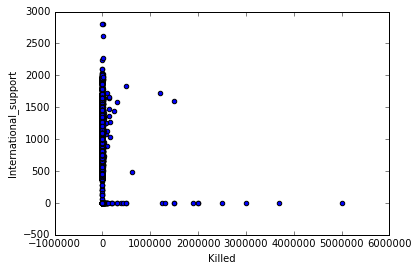

In [375]:
plt.scatter(df['Killed'], df['International_Support'])
plt.xlabel('Killed')
plt.ylabel('International_support')

# 2. Scatterplot - Affected/International Support

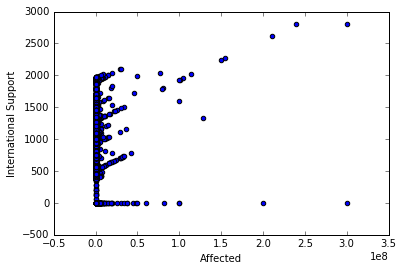

In [376]:
%matplotlib inline
plt.scatter(df['Affected'], df['International_Support'])
plt.xlabel('Affected')
plt.ylabel('International Support')

# 3. Scatterplot - Affected/Cost

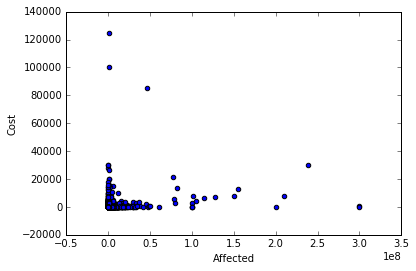

In [377]:
%matplotlib inline
plt.scatter(df['Affected'], df['Cost'])
plt.xlabel('Affected')
plt.ylabel('Cost')

# 4. Scatterplot - Killed/Cost 

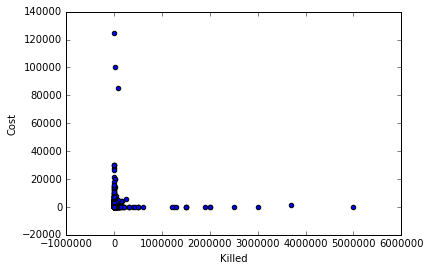

In [378]:
%matplotlib inline

plt.scatter(df['Killed'], df['Cost'])
plt.xlabel('Killed')
plt.ylabel('Cost')

# 5. Barchart - Type of Disaster

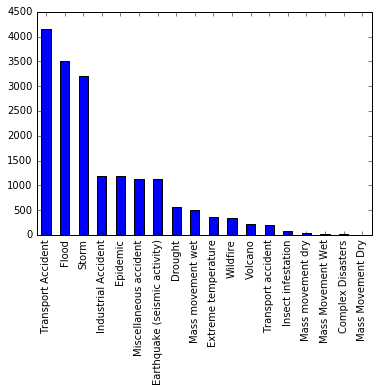

In [379]:
fig, ax = plt.subplots()
df['Type'].value_counts().plot(ax=ax, kind='bar')

# 6. Barchart - Subtype of Disaster

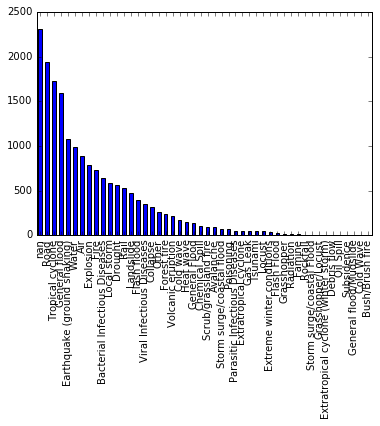

In [380]:
fig, ax = plt.subplots()
df['Sub_Type'].value_counts().plot(ax=ax, kind='bar')

# Task 3: Saving data

In [381]:
df.to_csv('27347885_parsed_data.csv')